My metric is the amount of Crime in different neighborhoods.


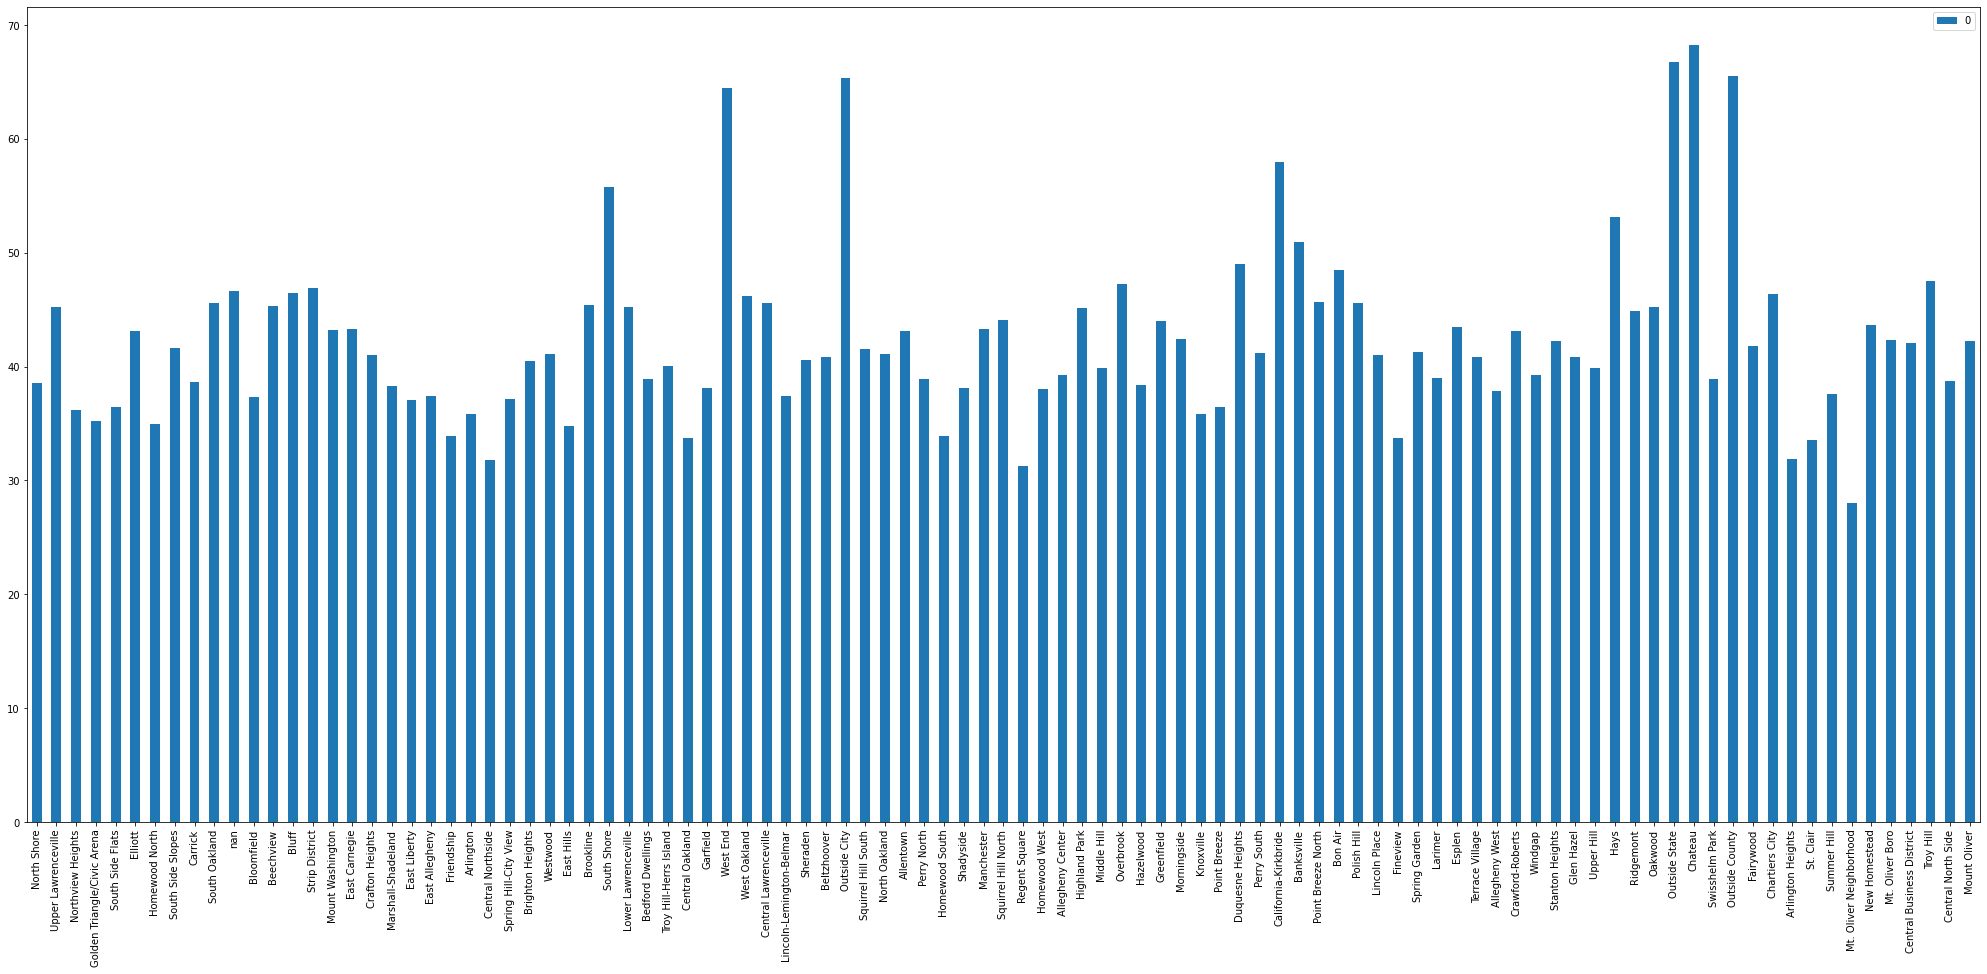

In [1]:
import pandas as pd
import geopandas
%matplotlib inline

print("My metric is the amount of Crime in different neighborhoods.")
chip = pd.read_csv("data/CrimeRate.csv")

dict = {}
dict_count = {}
for index, row in chip.iterrows():
    if not row['INCIDENTNEIGHBORHOOD'] in dict:
        dict[row['INCIDENTNEIGHBORHOOD']] = row['HIERARCHY']
        dict_count[row['INCIDENTNEIGHBORHOOD']] = 1
    else:
        dict[row['INCIDENTNEIGHBORHOOD']] = dict.get(row['INCIDENTNEIGHBORHOOD']) + row['HIERARCHY']
        dict_count[row['INCIDENTNEIGHBORHOOD']] = dict_count.get(row['INCIDENTNEIGHBORHOOD']) + 1
        
mean = {}
for (k,v), (k2,v2) in zip(dict.items(), dict_count.items()):
     mean[k] = v/v2
        
mean_dataframe = pd.DataFrame.from_dict(mean, orient = 'index')

#neighborhoods = geopandas.read_file("data/neighborhoods.shp") # read in the shapefile
#mean_map = neighborhoods.merge(mean_dataframe, how='left')
mean_dataframe.plot(kind = "bar", figsize=(35,15))

I took all of the neigborhoods in Pittsburghg included ina data set which included statisitcs on all the crimes that took place in different neighborhoods. Included in each crime and neighborhood was a hierarchy number for the crime which represented how bad the crime was. I took hierarchies for each neighborhood's crimes and added them up. I then found the average of them using the sum of the hierarchies and the total number of crimes for each neihborhood. As a result, I conclude that Chateau is the worst neighborhood because it has the highest average hierarchy of crimes.